In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
df = pd.read_csv('drug.csv')
df

,sex,dose,response
0,1,0.1,13.75
1,1,0.2,12.90
2,1,0.3,19.26
3,1,0.4,20.34
4,1,0.5,19.97
5,1,0.6,26.80
6,1,0.7,26.33
7,1,0.8,32.94
8,1,0.9,34.10
9,1,1.0,35.02


In [7]:
drdf = df.drop(['sex'],axis=1)
# drdf

# Without Sex column

In [16]:
test_frac = 0.3
test = drdf.sample(frac=test_frac)
test_x = pd.DataFrame(test.iloc[:,0])
test_y = pd.DataFrame(test.iloc[:,1])

train = drdf.loc[~(drdf.index.isin(test.index))]
train_x = pd.DataFrame(train.iloc[:,0])
train_y = pd.DataFrame(train.iloc[:,1])
print(drdf.shape, test.shape, train.shape)

(3200, 2) (960, 2) (2240, 2)


In [17]:
lr = linear_model.LinearRegression()

lr.fit(train_x,train_y)

op = lr.predict(test_x)

In [71]:
errors = []
ty = list(test_y.iloc[:,0])
for i in range(len(op)):
    temp = (op[i][0]-ty[i])**2
#     temp = round(temp,3)
    errors.append(temp)
print(errors)

[333.83836980631486, 643.8700859306402, 407.9570319123277, 2171.0366164163147, 2245.714192010714, 2805.7170604952726, 5408.002976689668, 603.1337769574375, 1185.2743871447124, 11586.948226986297, 868.1592620241556, 5513.188443830944, 4933.064024981944, 1691.587579493245, 810.6623585944621, 6945.129626741434, 6219.294354543888, 3157.579563115305, 12213.794809583833, 2882.5080125338604, 320.72258306139304, 3443.4512346344404, 6642.657969550971, 15766.856610054558, 163.8738856581579, 2129.6109984991535, 11105.516445919193, 396.724582023495, 9837.859792280331, 13716.185082845257, 67.42626892278851, 14330.356942034952, 12917.701137290369, 5.578923642044519, 13882.460957295483, 95.41328961449817, 9725.11266839269, 6812.98288375879, 52.10890773433576, 3508.0799178088987, 10527.993756490054, 3137.9777449543017, 5020.3100356777495, 2.4796830823050278, 7338.336894908897, 10845.006973196529, 11113.948663052828, 14652.980313951995, 9425.032874391896, 563.9624408438194, 67.9198499231549, 10543.0407

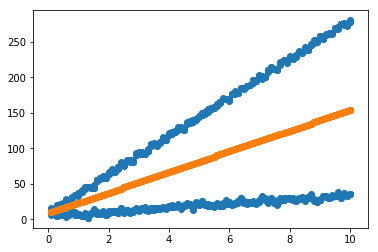

In [78]:
plt.scatter(test_x,test_y)
plt.scatter(test_x,op)
plt.show()

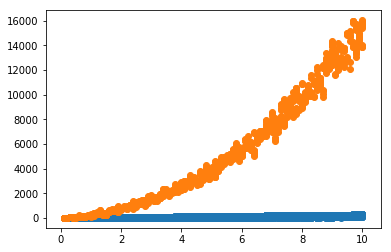

In [84]:
plt.scatter(test_x,test_y)
plt.scatter(test_x,errors)
plt.show()

(array([137.,  89.,  55.,  48.,  51.,  48.,  29.,  23.,  35.,  40.,  27.,
         24.,  26.,  27.,  22.,  18.,  26.,  27.,  27.,  25.,  19.,   8.,
         15.,  21.,  20.,  20.,  19.,  11.,   8.,  15.]),
 array([1.16946574e-01, 5.34248336e+02, 1.06837973e+03, 1.60251112e+03,
        2.13664250e+03, 2.67077389e+03, 3.20490528e+03, 3.73903667e+03,
        4.27316806e+03, 4.80729945e+03, 5.34143084e+03, 5.87556223e+03,
        6.40969362e+03, 6.94382501e+03, 7.47795640e+03, 8.01208779e+03,
        8.54621918e+03, 9.08035057e+03, 9.61448196e+03, 1.01486133e+04,
        1.06827447e+04, 1.12168761e+04, 1.17510075e+04, 1.22851389e+04,
        1.28192703e+04, 1.33534017e+04, 1.38875331e+04, 1.44216645e+04,
        1.49557959e+04, 1.54899272e+04, 1.60240586e+04]),
 <a list of 30 Patch objects>)

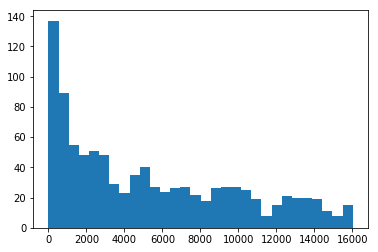

In [86]:
plt.hist(errors,bins=30)

# With both columns

In [101]:
test_frac = 0.3
test = df.sample(frac=test_frac)
test_x = pd.DataFrame(test.iloc[:,:2])
test_y = pd.DataFrame(test.iloc[:,2])

train = df.loc[~(drdf.index.isin(test.index))]
train_x = pd.DataFrame(train.iloc[:,:2])
train_y = pd.DataFrame(train.iloc[:,2])
print(df.shape, test.shape, train.shape)

(3200, 3) (960, 3) (2240, 3)


In [106]:
lr = linear_model.LinearRegression()

lr.fit(train_x,train_y)

op = lr.predict(test_x)

In [107]:
print(mean_squared_error(test_y,op))

1199.1768693290346


In [108]:
errors = []
ty = list(test_y.iloc[:,0])
for i in range(len(op)):
    temp = (op[i][0]-ty[i])**2
#     temp = round(temp,3)
    errors.append(temp)
print(errors)

[415.76607142854476, 537.9670661619087, 1335.5698195188545, 83.74681280553358, 2678.960092406244, 52.086815641775054, 1250.2352063324274, 211.52587031350396, 3.1840611333688535, 2596.738191627021, 679.9611507672954, 1842.857312860218, 2256.699665516384, 311.04717271035116, 1435.0559682655303, 34.16494664591126, 1532.1625629748853, 93.71133745976687, 202.75817951144205, 740.9165795820721, 2.064952573775445, 3144.323565180404, 1028.3102648565023, 6.68357241890878, 44.53353569060175, 1880.1110770401879, 1349.0248559017432, 983.8843947159279, 871.2184786929652, 2858.0572380130698, 45.40046153206108, 2.72342363339733, 3164.2401719006293, 3229.529342656001, 3415.935146659711, 1343.0611264817526, 85.5870784999673, 3805.055896715047, 340.71442243669384, 363.1843550640167, 636.2843122816008, 691.1183566783321, 1088.6424312271586, 1111.8406578930176, 85.23865606638064, 4.691320678035718, 498.3911876903852, 3458.5979405024436, 40.12224169236917, 1282.65777161578, 107.19305236491893, 1222.10827415

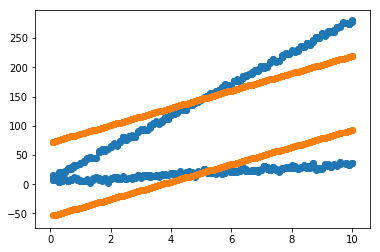

In [113]:
plt.scatter(test_x['dose'],test_y)
plt.scatter(test_x['dose'],op)
plt.show()

(array([193.,  80.,  63.,  50.,  47.,  38.,  30.,  37.,  39.,  27.,  27.,
         36.,  18.,  16.,  17.,  15.,  19.,  17.,  23.,  28.,  25.,  18.,
         16.,  20.,  15.,  17.,  11.,  13.,   4.,   1.]),
 array([1.35516127e-03, 1.35194525e+02, 2.70387694e+02, 4.05580863e+02,
        5.40774033e+02, 6.75967202e+02, 8.11160372e+02, 9.46353541e+02,
        1.08154671e+03, 1.21673988e+03, 1.35193305e+03, 1.48712622e+03,
        1.62231939e+03, 1.75751256e+03, 1.89270573e+03, 2.02789890e+03,
        2.16309207e+03, 2.29828524e+03, 2.43347840e+03, 2.56867157e+03,
        2.70386474e+03, 2.83905791e+03, 2.97425108e+03, 3.10944425e+03,
        3.24463742e+03, 3.37983059e+03, 3.51502376e+03, 3.65021693e+03,
        3.78541010e+03, 3.92060327e+03, 4.05579644e+03]),
 <a list of 30 Patch objects>)

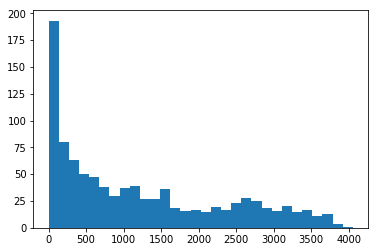

In [114]:
plt.hist(errors,bins=30)